<a href="https://colab.research.google.com/github/crazygovind/AI-Foundation-Whitehat-Jr/blob/master/37_Capstone_Project_Video_Game_Sales_Analysis_Grouping_%26_Aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 10: Video Game Sales Analysis - Grouping & Aggregation

### Context

Video games creation is essentially a software development process. Generally, publishers such as EA Sports, Atari, Rockstar Games etc. fund the game development process. However, for publishers, it is very important to estimate the cost of development of a video game. Most of the commercial games do not generate adequate profit. 

A video game is an interactive visual story. A new game must provide novelty and must be a product of innovation. Nevertheless, once the companies become financially stable by making sufficient profits, they may expand to develop newer games or sequels to the initial ones such as FIFA, Call of Duty, Age of Empires etc.

An average development budget for a multiplatform (PC, PS, Xbox etc.) game is US \$18 to 28 million, with high-profile games often exceeding US $40 million.



---

### Problem Statement

Imagine that you work for one of the world's biggest tech giants as a data analyst. The company intends to venture into the video game development business by either creating their own video games and gaming platforms or by funding a group of individual game developers.

As a part of market research, your CEO wants to come up with a business strategy to enable your company to enter into the video game development business. However, in the best interest of companies financial investment in this project, it is important to know whether there are enough buyers, in the long run, do the number of buyers increase so that they stay invested in this project.

Your CEO would like to know what kind of games are most popular in terms of the most units sold, what are the most commonly used gaming platforms such as PS4, Xbox, PC etc.

---

### Dataset Description

You are provided with a video games sales dataset. It consists of the following features:

1. `Rank` - Rank based on the number of units sold of a game. The most sold game is ranked 1.

2. `Name` - The name of a video game.

3. `Platform` - The platform (PC, PS4, XBox etc.) for which a game is released.

4. `Year` - The release year of a video game.

5. `Genre` - The genre of a video game.

6. `Publisher` - The publisher of a video game.

7. `NA_Sales` - Approximately, the total number of units sold (in million) of a video game in North America.

8. `EU_Sales` - Approximately, the total number of units sold (in million) of a video game in Europe.

9. `JP_Sales` - Approximately, the total number of units sold (in million) of a video game in Japan.

10. `Other_Sales` - Approximately, the total number of units sold (in million) of a video game in the rest of the world.

11. `Global_Sales` - Approximately, the total number of units sold (in million) of a video game all over the world.

Here's a link to the dataset:

https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/video-games-sales/video-game-sales.csv

---

### Things To Do

- The `Year` and `Publisher` columns contain few missing values. Treat them accordingly.

- Convert the values contained in the `Year` column into integer values.

- Find out:

  1. The trend of growth in the number of total units sold across the given regions and the world. Also create year-wise line plots for the total number of units sold across different regions and the world.
  
  2. Top 10 most sold genres of video games but at least 100 million units sold globally. Also create genre-wise line plots for the total number of units sold across different regions and the world.

  3. Top 10 best publishers of video games but at least 100 million units sold globally. 
  
  4. Top 10 most commonly used gaming platform but at least 100 million units sold globally.

---

#### 1. Import Modules & Load Data

In [ ]:
# Importing the modules and loading the dataset.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data_link = 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/video-games-sales/video-game-sales.csv'
df = pd.read_csv(data_link)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Get the counts of Non-Null values and the datatype of each column. 

In [ ]:
# Get the dataset information using the 'info()' function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


---

#### 2. Treat Null Values

In most of the cases, we do not get complete datasets. They either have some values missing from the rows and columns or they do not have standardised values.

For example: If there is a date column in a dataset, then there is a huge chance that some of the dates are entered in the `DD-MM-YYYY` format, some in the `MM-DD-YYYY` format and so on.

So, before going ahead with the analysis, it is a good idea to check whether the dataset has any missing values.

In [ ]:
# Check for the null values in all the columns using 'df.isnull().sum()'.
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**Q:** Which of the columns are having null values?

**A:** Year and Publisher column have null values.

In [ ]:
# Remove the rows/columns containing the null values .
df=df.dropna()
df[df['Year'].isna() == False]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**Hint**: You can use the `isna()` function to achieve the above task.

Syntax: `df[df['column_name'].isna() == False]`

In [ ]:
# Convert the data-type of the year values into integer values.
df['Year'] = df['Year'].astype('int')

**Hint**: You can use the `astype()` function to convert the data-type.

Syntax: `df['column_name'] = df['column_name'].astype('int')`

---

#### 3. Yearly Total Units Sold

Here you need to get the year wise sales of video games from the following columns:

 - `NA_Sales` 
 -`EU_Sales` 
 -`JP_Sales` 
 -`Other_sales` 
 -`Global_Sales`




In [ ]:
# Find out the total number of units sold yearly across different regions and the world.
 # store the number of units sold yearly in a variable (let's say 'group_year').
group_year = df.groupby(by='Year')
 # Get the total units sold from last 5 columns.
yearly_total_sales = group_year.sum().loc[:, ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
yearly_total_sales.head()


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36



In the above code,

- We have grouped the values of the DataFrame by the `Year` value using the `groupby()` function. 

- We have calculated the sum of the total units sold from last 5 columns using the `loc[]` function along with the `sum()` function on `group_year`.

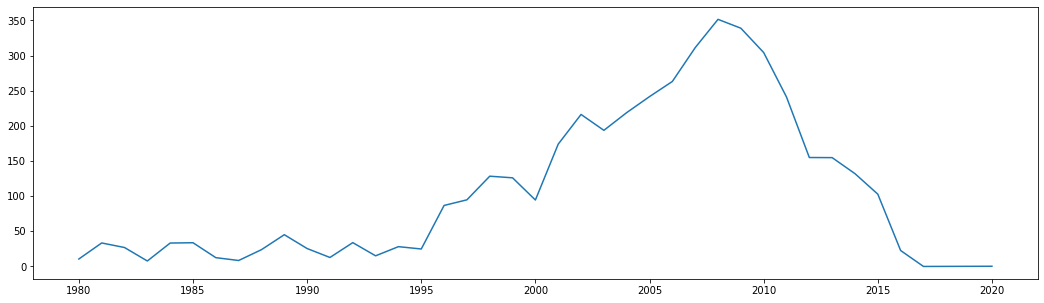

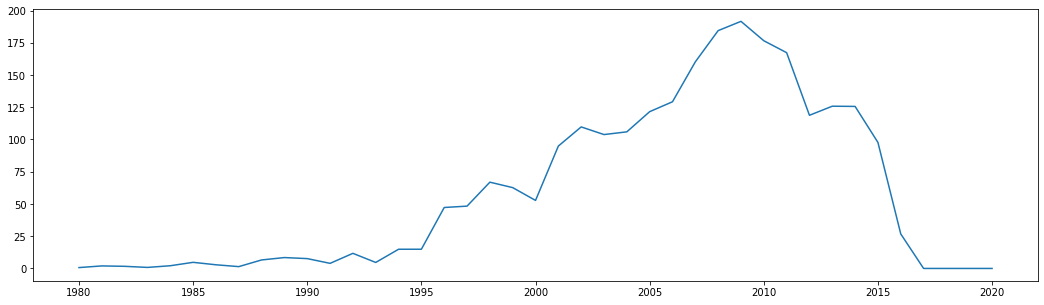

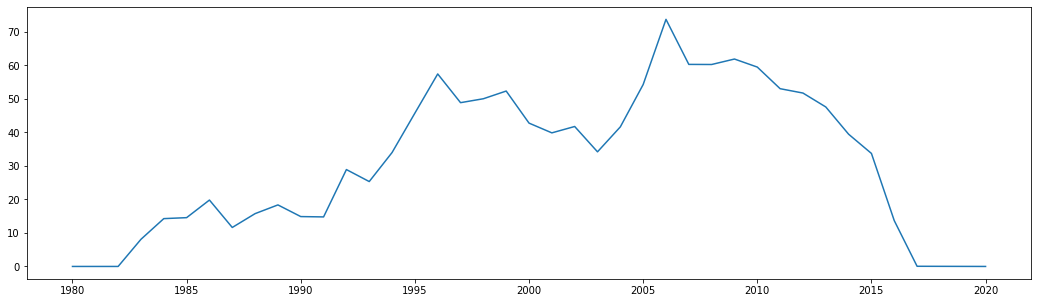

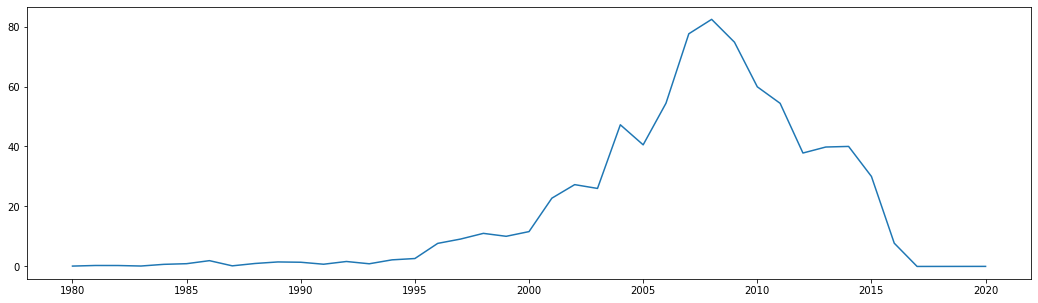

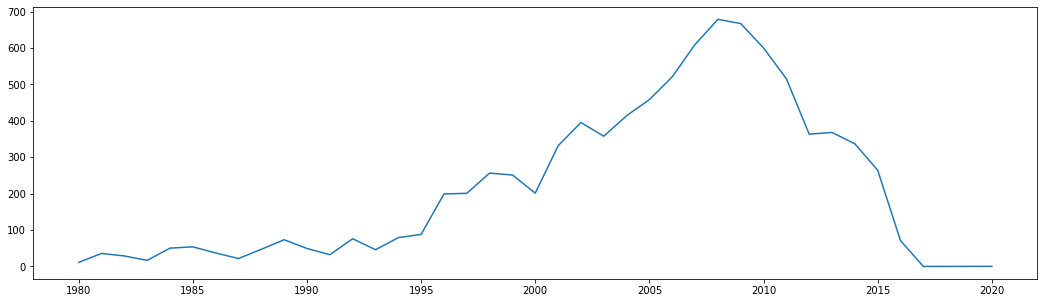

In [ ]:
# Create the line plots for the total number of units sold yearly across different regions and the world.
for col in yearly_total_sales.columns:
  plt.figure(figsize=(18, 5))
  plt.plot(yearly_total_sales.index, yearly_total_sales[col])
  plt.show()

**Q:** In which year, the most number of games were sold globally and how many?

**A:** 

In [ ]:
# In which year, the most number of games were sold globally and how many?
yearly_total_sales['Global_Sales'].max()

678.9

**Hint**: You can get the year with maximum value from `Global_Sales` column using the `max()` function.

Syntax: `yearly_total_sales['Global_Sales'].max()]`

---

#### 4. Genre-wise Total Units Sold

We perform the following tasks to get an idea of which type of video game is most popular globally.

The video games are classified into following Genre: 

 - Action

 - Adventure

 - Fighting

 - Misc

 - Platform

 - Puzzle

 - Racing

 - Role-Playing

 - Shooter 

 - Simulation

You need to group the Dataframe by `Genre`.

In [ ]:
# Find out the genre-wise total number of units sold across different regions and the world.
group_genre=df.groupby(by='Genre')
total_sales=group_genre.sum().loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
total_sales.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13


**Hint**: Follow the similar steps performed to get the yearly total units sold.

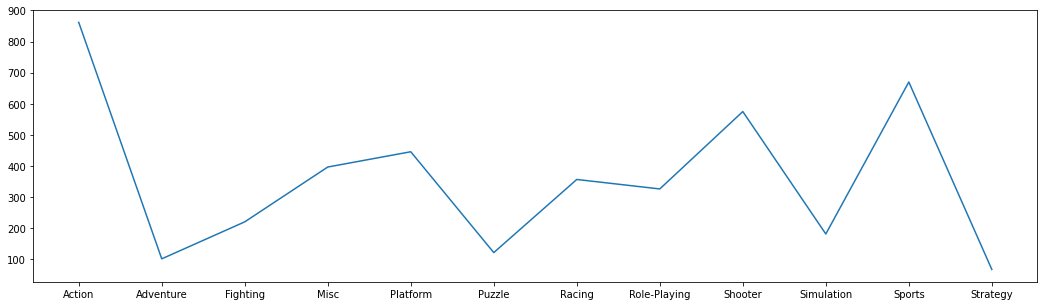

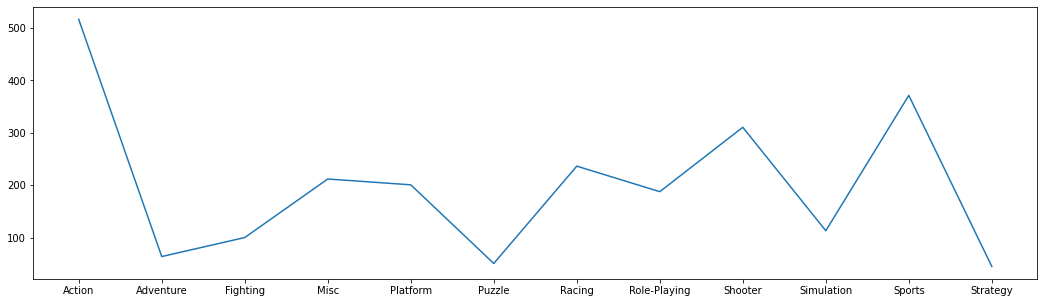

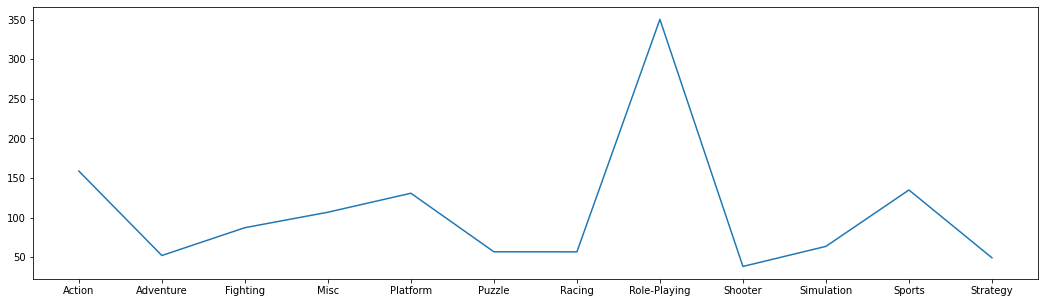

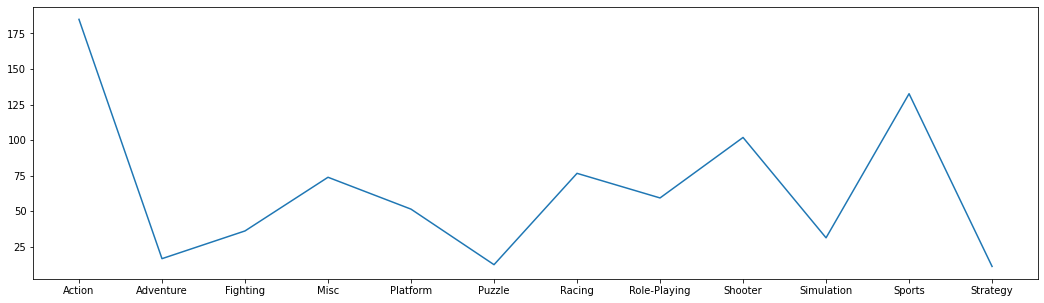

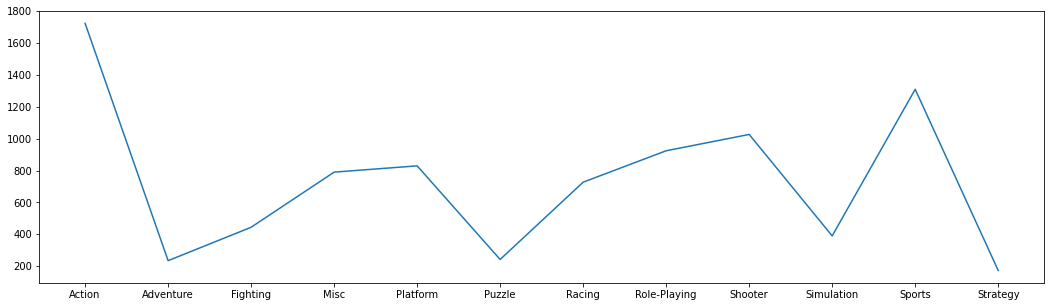

In [ ]:
# Create line plots for genre-wise total number of units sold across different regions and the world.
for col in total_sales.columns:
  plt.figure(figsize=(18,5))
  plt.plot(total_sales.index,total_sales[col])
  plt.show()

**Q:** What genre of video game is most popular in Japan in terms of the total number of units sold? Also, provide the total number of units sold in Japan for that genre.

**A:** 

In [ ]:
# What genre of video game is most popular in Japan in terms of the total number of units sold?
total_sales['JP_Sales'].max()

350.29

**Hint**: You can get the row with maximum value from `JP_sales` column by using the `max()` function.

In [ ]:
# Genre-wise total number of units sold across different regions and the world in descending order.
 # Get the total units sold from last 5 columns.
print(total_sales.tail())
print('\n \n')
 # Sort the values in descending order
genre_desc = total_sales.sort_values(by='Global_Sales', ascending=False)
genre_desc.head(10)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Role-Playing    326.50    187.57    350.29        59.38        923.83
Shooter         575.16    310.45     38.18       101.90       1026.20
Simulation      181.78    113.02     63.54        31.36        389.98
Sports          670.09    371.34    134.76       132.65       1309.24
Strategy         67.83     44.84     49.10        11.23        173.27

 



,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.29,59.38,923.83
Platform,445.99,200.65,130.65,51.51,829.13
Misc,396.92,211.77,106.67,73.92,789.87
Racing,356.93,236.31,56.61,76.68,726.76
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.02,63.54,31.36,389.98


In the above code,

- We have passed the `Global_Sales` column inside the `by` attribute of the `sort_values()` function to sort the Genre-wise total number of units sold across the world in ascending order.

- To sort values in descending order, set the `ascending` attribute of the `sort_values()` function to `False`.  

**Q:** Which genre of the video games sells the most globally and how much?

**A:** 

---

#### 5. Publisher-wise Total Units Sold

We perform the following task to get an idea of which publisher of video game has the most number of sales.

We have the following popular video game Publishers: 

 - Nintendo

 - Electronic Arts

 - Activision

 - Sony Computer Entertainment

 - Ubisoft

 - Take-Two Interactive

 - THQ

 - Konami Digital Entertainment

 - Sega 

 - Namco Bandai Games

You need to group the Dataframe by `Publisher`.

In [ ]:
# Publisher-wise total number of units sold across different regions and the world in descending order.
 # Get the total units sold from last 5 columns.
group_publisher=df.groupby(by='Publisher')
publisher_total_sales=group_publisher.sum().loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
print(publisher_total_sales.tail())
print('\n \n')
 # Sort the values in descending order
publisher_des=publisher_total_sales.sort_values(by='Global_Sales',ascending=False)
publisher_des.head(10)

                      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Publisher                                                                    
id Software               0.02      0.00      0.00         0.00          0.03
imageepoch Inc.           0.00      0.00      0.04         0.00          0.04
inXile Entertainment      0.02      0.06      0.00         0.01          0.10
mixi, Inc                 0.00      0.00      0.86         0.00          0.86
responDESIGN              0.09      0.04      0.00         0.01          0.13

 



,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
Take-Two Interactive,220.47,117.95,5.83,55.20,399.30
THQ,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,88.91,68.62,90.93,29.91,278.56
Sega,108.78,81.41,56.19,24.30,270.70


**Q:** Which video game publisher sells the most number of units globally and how much?

**A:** 

**Hint**: Follow the similar steps performed to get the Genre-wise total units sold.

---

#### 6. Platform-wise Total Units Sold

We perform the following task to get an idea of which the gaming platform has the most number of sales.

You need to group the Dataframe by `Platform`.

In [ ]:
from pandas.compat import platform
# Find out the platform-wise the total number of units sold across different regions and the world in the descending order.
 # Get the total units sold from last 5 columns.
group_platfrom=df.groupby(by='Platform')
platform_total_sales=group_platfrom.sum().loc[:,['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
print(platform_total_sales.tail())
print('\n \n')
 # Sort the values in descending order
platform_des=platform_total_sales.sort_values(by='Global_Sales',ascending=False)
platform_des.head()

          NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
Wii         497.37    264.35     68.28        79.20        909.81
WiiU         38.32     24.23     12.79         6.45         81.86
X360        594.33    278.00     12.30        84.67        969.60
XB          182.06     59.65      1.38         8.48        252.09
XOne         83.19     45.65      0.34        11.92        141.06

 



,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.53,194.05,175.02,60.29,818.91


**Q:** For which platform of a video game, the most number of units are sold globally and how much?

**A:** 

**Hint**: Follow the similar steps performed to get the Genre-wise total units sold.

---